In [2]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./insurance.csv")

# Задание 1

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
target = "charges"
num_features = []
cat_features = []
for c, t in df.dtypes.items():
    if c == target:
        continue
    elif t == np.int64:
        num_features.append(c)
    elif t == np.float64:
        num_features.append(c)
    else:
        cat_features.append(c)

In [8]:
train, test = train_test_split(df, test_size=0.1, random_state=42)

In [9]:
onehot = OneHotEncoder(sparse_output=False).fit(train[cat_features])
scaler = StandardScaler().fit(train[num_features])

def apply(data):
    res = data.copy()
    res[onehot.get_feature_names_out().tolist()] = onehot.transform(data[cat_features])
    res[num_features] = scaler.transform(data[num_features])
    res = res.drop(columns=cat_features)
    return res.drop(columns=[target]), res[target]

In [10]:
X, y = apply(train)
Xtest, ytest = apply(test)

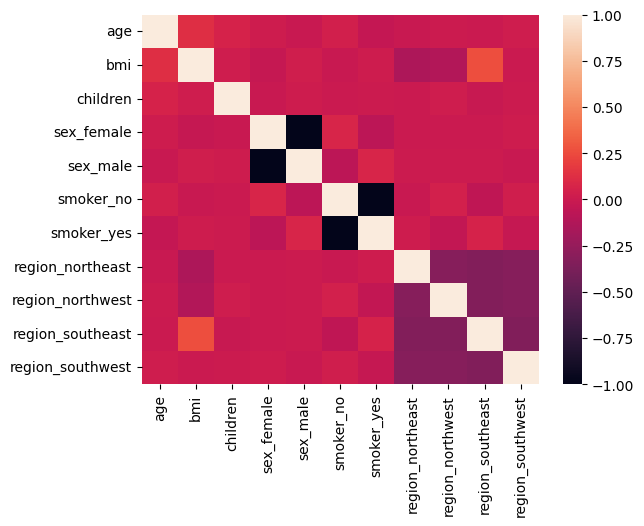

In [11]:
sns.heatmap(X.corr())
plt.show()

# Задание 2

In [29]:
class AnaliticRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
        self.w = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
        return self

    def transform(self, X):
        X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
        return X_with_bias @ self.w

In [30]:
areg = AnaliticRegression().fit(X, y)

In [ ]:
class SgdRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        